In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

# Load the dataset

In [316]:
file_path = '/content/Capstone Data - Supermarket Sales.csv'
data = pd.read_csv(file_path)

#Explore The Data

In [317]:
print("Data:\n", data.head())

Data:
     Invoice ID Branch  Yangon  Naypyitaw  Mandalay Customer type Gender  \
0  750-67-8428      A       1          0         0        Normal   Male   
1  226-31-3081      C       0          1         0        Normal   Male   
2  631-41-3108      A       1          0         0        Normal   Male   
3  123-19-1176      A       1          0         0        Normal   Male   
4  373-73-7910      A       1          0         0        Normal   Male   

             Product line Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty      74.69         7  26.1415       NaN   1/5/2019   
1  Electronic accessories      15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle      46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty      58.22         8      NaN  489.0480  1/27/2019   
4       Sports and travel      86.31         7  30.2085  634.3785   2/8/2019   

        Time      Payment  Rating  
0      13:08      Ewallet

# Check for unique values

#Checking on Unit price

In [318]:
print(data['Unit price'].unique())

['74.69' '15.28' '46.33' '58.22' '86.31' '85.39' '68.84' '73.56' '36.26'
 '54.84' '14.48' '25.51' '46.95' '43.19' '71.38' '93.72' '68.93' '72.61'
 '54.67' '40.3' '86.04' '87.98' '33.2' '34.56' '88.63' '52.59' '33.52'
 '87.67' '88.36' '24.89' '94.13' '78.07' '83.78' '96.58' '99.42' '68.12'
 '62.62' '60.88' '54.92' '30.12' '86.72' '56.11' '69.12' '98.7' '15.37'
 '93.96' '56.69' '20.01' '18.93' '82.63' '91.4' '44.59' '17.87' '15.43'
 '16.16' '85.98' '44.34' '89.6' '72.35' '30.61' '24.74' '55.73' '55.07'
 '15.81' '75.74' '15.87' '33.47' '97.61' '78.77' '18.33' '89.48' '62.12'
 '48.52' '75.91' '74.67' '41.65' '49.04' '78.31' '20.38' '99.19' '96.68'
 '19.25' '80.36' '48.91' '83.06' '76.52' '49.38' '42.47' '76.99' '47.38'
 '44.86' '21.98' '64.36' '89.75' '97.16' '87.87' '12.45 USD' '52.75'
 '82.7' '48.71' '78.55' '23.07' '58.26' '30.35' '88.67' '27.38' '62.13'
 '33.98' '81.97' '16.49' '98.21' '72.84' '58.07' '80.79' '27.02' '21.94'
 '51.36' '10.96' '53.44' '99.56' '57.12' '99.96' '63.91' '56.

In [319]:
data['Unit price'] = data['Unit price'].str.replace(' USD', '', regex=False).astype(float)

In [320]:
pd.set_option('display.max_rows', None)
data['Unit price'].unique()

array([74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, 36.26,
       54.84, 14.48, 25.51, 46.95, 43.19, 71.38, 93.72, 68.93, 72.61,
       54.67, 40.3 , 86.04, 87.98, 33.2 , 34.56, 88.63, 52.59, 33.52,
       87.67, 88.36, 24.89, 94.13, 78.07, 83.78, 96.58, 99.42, 68.12,
       62.62, 60.88, 54.92, 30.12, 86.72, 56.11, 69.12, 98.7 , 15.37,
       93.96, 56.69, 20.01, 18.93, 82.63, 91.4 , 44.59, 17.87, 15.43,
       16.16, 85.98, 44.34, 89.6 , 72.35, 30.61, 24.74, 55.73, 55.07,
       15.81, 75.74, 15.87, 33.47, 97.61, 78.77, 18.33, 89.48, 62.12,
       48.52, 75.91, 74.67, 41.65, 49.04, 78.31, 20.38, 99.19, 96.68,
       19.25, 80.36, 48.91, 83.06, 76.52, 49.38, 42.47, 76.99, 47.38,
       44.86, 21.98, 64.36, 89.75, 97.16, 87.87, 12.45, 52.75, 82.7 ,
       48.71, 78.55, 23.07, 58.26, 30.35, 88.67, 27.38, 62.13, 33.98,
       81.97, 16.49, 98.21, 72.84, 58.07, 80.79, 27.02, 21.94, 51.36,
       10.96, 53.44, 99.56, 57.12, 99.96, 63.91, 56.47, 93.69, 32.25,
       31.73, 68.54,

#Checking on Gender Column

In [321]:
print(data['Gender'].unique())

['Male' 'Female']


#Checking on Cutomer Column

In [322]:
print(data['Customer type'].unique())

['Normal' '-' 'Member' 'Memberr']


#Checking on Branch Column

In [323]:
print(data['Branch'].unique())

['A' 'C' 'B']


#Checking on Rating Column

In [324]:
print(data['Rating'].unique())

[ 9.1  9.6  7.4  8.4  5.3  4.1  5.8  8.   7.2  5.9  4.5  6.8  7.1  8.2
  5.7  4.6  6.9  8.6  4.4  4.8  5.1  9.9  6.   8.5  6.7  7.7  7.5  7.
  4.7  7.6  7.9  6.3  5.6  9.5  8.1  6.5  6.1  6.6  5.4  9.3 10.   6.4
  4.3  4.   8.7  9.4  5.5  8.3  7.3  4.9  4.2  9.2  7.8  5.2  9.   8.8
  6.2  9.8 97.   5.   9.7  8.9]


#Checking on Time Column

In [325]:
print(data['Time'].unique())

['13:08' '10:29' '13:23' '8 - 30 PM' '10:37' '18:30' '14:36' '11:38'
 '17:15' '13:27' '18:07' '17:03' '10:25' '16:48' '19:21' '16:19' '11:03'
 '10:39' '18:00' '15:30' '11:24' '10:40' '12:20' '11:15' '17:36' '19:20'
 '15:31' '12:17' '19:48' '15:36' '19:39' '12:43' '14:49' '10:12' '10:42'
 '12:28' '19:15' '17:17' '13:24' '13:01' '18:45' '10:11' '13:03' '20:39'
 '19:47' '17:24' '15:47' '12:45' '17:08' '10:19' '15:10' '14:42' '15:46'
 '11:49' '19:01' '11:26' '11:28' '15:55' '20:36' '17:47' '10:55' '13:40'
 '12:27' '14:35' '16:40' '15:43' '15:01' '10:04' '18:50' '12:46' '18:17'
 '18:21' '17:04' '14:20' '15:48' '16:24' '18:56' '19:56' '18:37' '10:17'
 '14:31' '10:23' '20:35' '16:57' '17:55' '19:54' '16:42' '12:09' '20:05'
 '20:38' '13:11' '10:16' '18:14' '13:22' '11:27' '16:44' '18:19' '14:50'
 '20:54' '20:19' '10:43' '14:30' '11:32' '10:41' '12:44' '20:07' '20:31'
 '12:29' '15:26' '20:48' '12:02' '17:26' '19:52' '14:57' '18:44' '13:26'
 '16:17' '15:57' '13:18' '20:34' '18:36' '14:40' '16:43

#Checking on Payment Column

In [326]:
print(data['Payment'].unique())

['Ewallet' 'Cash' 'Credit card']


# Check for missing values

In [327]:
missing_values = data.isnull().sum()
print(missing_values)

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           9
Total            3
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


# Check for duplicate rows

In [328]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 6


# detect outliers based on the IQR

In [329]:
# Identifying numeric columns for outlier detection
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Rating']

In [330]:
# Function to calculate IQR and detect outliers
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [331]:
# Detect outliers in the dataset
outliers = detect_outliers(data, numeric_columns)

In [332]:
# Checking if there are outliers and the number of outliers in each column
outlier_counts = {col: len(outliers[col]) for col in numeric_columns}

In [333]:
# Print outlier counts
print(outlier_counts)

{'Unit price': 0, 'Quantity': 3, 'Tax 5%': 7, 'Total': 9, 'Rating': 1}


In [334]:
# Extract outlier values for each column
outlier_values = {col: outliers[col][col].values for col in numeric_columns}
# Print out the outlier values
for col, values in outlier_values.items():
    print(f"Outliers in {col}: {values}")


Outliers in Unit price: []
Outliers in Quantity: [-8 -8 -7]
Outliers in Tax 5%: [49.49  49.65  48.605 49.26  48.75  48.685 48.69 ]
Outliers in Total: [1003.59  1039.29  1042.65  1002.12  1020.705 1034.46  1023.75  1022.385
 1022.49 ]
Outliers in Rating: [97.]




---



#Data Assessment Report

1. NULL Values:
  *   Tax 5%
    *   Issue: 9 rows with missing values.
    *   Action: Replace with calculated value: Total - (Price * Quantity).
  *   Total:
    *    Issue: 3 rows with missing values.
    *    Action: Replace with calculated value: Price * Quantity + Tax.

2. Currency Symbols:
  *   UnitPrice:
    *   Issue: 5 rows contain 'USD' as a suffix.
    *   Action: Remove 'USD' and convert to float.
  *   Customer Type:
    *   Issue: 27 rows have non-standard entries.
    *   Action: Replace with 'Normal'.

3. Time Format:
  *   Time:
    *   Issue: 1 row with time format '8:30 PM'.
    *   Action: Standardize all time formats to 'HH:MM
    *   AM/PM' (e.g., '01:27:00 PM').

4. Data Types:
  *   UnitPrice:
    *   Issue: Column is of type object instead of float.
    *   Action: Convert UnitPrice from object to float.

5. Duplicate Rows:
    *   Issue: 6 duplicate rows.
    *   Action: Drop duplicate rows.

6. Outliers:
  *   Quantity:
    *   Issue: 3 outliers with negative values [-8, -7, -1].
    *   Action: Replace negative values with their absolute values.
  *   Tax 5%:
    *   Issue: 7 values deemed as outliers [49.49, 49.65, 48.605, 49.26, 48.75, 48.685, 48.69].
    *   Action: No action required, values are not outliers.
  *   Total:
    *   Issue: 9 values in the range [1003.59, 1039.29, 1042.65, 1002.12, 1020.705, 1034.46, 1023.75, 1022.385, 1022.49].
    *   Action: No action required, values are not outliers.
  *   Rating:
    *   Issue: 1 outlier with value [97.].
    *   Action: Replace with 9.7.



---



# Step 1: Fixing outliers

##Fixing Rating outliers

In [335]:
# Replace the specific outlier value in the Rating column
data['Rating'] = data['Rating'].replace(97, 9.7)

###Test

In [336]:
data['Rating'].max()

10.0

##Fixing Customer column


In [337]:
data['Customer type'] = data['Customer type'].replace('Memberr', 'Member')

#Test

In [338]:
# Verify the replacement
print(data['Customer type'].unique())

['Normal' '-' 'Member']


##Fixing Quantity outliers

In [339]:
# Replace negative values with the absolute of the Quantity column
median_quantity = data['Quantity'].median()
data['Quantity'] = data['Quantity'].apply(lambda x: abs(x) if x < 0 else x)

###Test

In [340]:
data['Quantity'].min()

1

##Fixing Tax 5% outliers

In [341]:
# 7 in Tax 5%: [49.49  49.65  48.605 49.26  48.75  48.685 48.69 ] THIS DATA IS NOT OUTLIERS

###Test

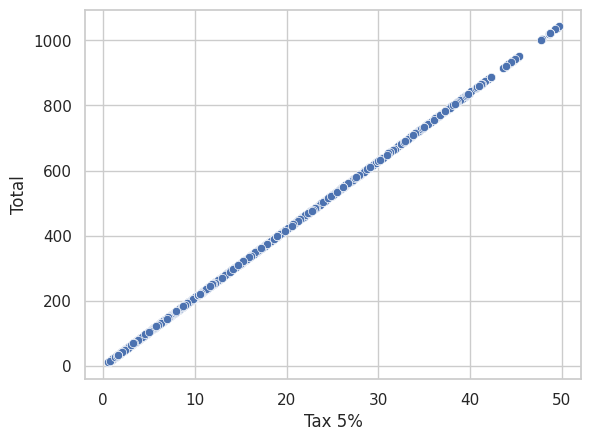

In [342]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'x_column' and 'y_column' are the columns you're interested in
sns.scatterplot(x=data['Tax 5%'], y=data['Total'])
plt.show()

##Fixing Total outliers

In [343]:
# 9 in Total: [1003.59  1039.29  1042.65  1002.12  1020.705 1034.46  1023.75  1022.385  1022.49 ] THIS DATA NOT OUTLIERS

###Test

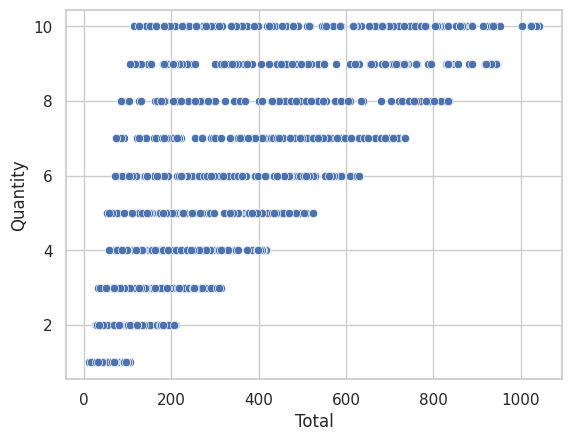

In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'x_column' and 'y_column' are the columns you're interested in
sns.scatterplot(x=data['Total'], y=data['Quantity'])
plt.show()

#Checking outliers

In [345]:
# Detect outliers in the dataset
outliers = detect_outliers(data, numeric_columns)

# Extract outlier values for each column
outlier_values = {col: outliers[col][col].values for col in numeric_columns}

# Print out the outlier values
for col, values in outlier_values.items():
    print(f"Outliers in {col}: {values}")


Outliers in Unit price: []
Outliers in Quantity: []
Outliers in Tax 5%: [49.49  49.65  48.605 49.26  48.75  48.685 48.69 ]
Outliers in Total: [1003.59  1039.29  1042.65  1002.12  1020.705 1034.46  1023.75  1022.385
 1022.49 ]
Outliers in Rating: []


# Step 2: Handling missing values

## Fill missing 'Tax 5%' using 5% of (Total - (Unit Price * Quantity))

In [346]:
data['Tax 5%'] = data['Tax 5%'].fillna(data['Total'] - (data['Unit price'] * data['Quantity']))

###Test

In [347]:
data['Tax 5%'].isnull().sum()

0

# Fill missing 'Total' as (Unit price * Quantity) + Tax

In [348]:
data['Total'] = data['Total'].fillna((data['Unit price'] * data['Quantity']) + data['Tax 5%'])

###Test

In [349]:
data['Total'].isnull().sum()

0

#Checking Nulls

In [350]:
data.isnull().sum()

,0
Invoice ID,0
Branch,0
Yangon,0
Naypyitaw,0
Mandalay,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0


# Step 3: Replace "-" in the "Customer type" column

In [351]:
data['Customer type'].replace("-", "Normal", inplace=True)

###Test

In [352]:
data['Customer type'].unique()

array(['Normal', 'Member'], dtype=object)

# Step 4: Fix time format
###Fill missing 'Time' with the most frequent time (mode)

In [353]:
# Define a function to clean and convert the time values
def clean_time_format(time_str):
    # Handle the "8 - 30 PM" type of entries (irregular format)
    cleaned_time_str = re.sub(r" - ", ":", time_str)  # Replace " - " with ":"
    try:
        # Parse the time string to convert to the desired format
        parsed_time = pd.to_datetime(cleaned_time_str, format='%I:%M %p', errors='coerce')
        if parsed_time is pd.NaT:  # If parsing fails, try again with the correct assumption of format
            parsed_time = pd.to_datetime(cleaned_time_str, format='%H:%M', errors='coerce')
        return parsed_time.strftime('%I:%M:%S %p')
    except:
        return time_str  # Return the original string if it can't be parsed

In [354]:
# Apply the cleaning function to the 'Time' column
data['Time'] = data['Time'].apply(clean_time_format)

###Test

In [355]:
# Check if the 'Time' column now has a consistent format
print(data['Time'].unique()[:10])  # Display a sample of the cleaned 'Time' values

['01:08:00 PM' '10:29:00 AM' '01:23:00 PM' '08:30:00 PM' '10:37:00 AM'
 '06:30:00 PM' '02:36:00 PM' '11:38:00 AM' '05:15:00 PM' '01:27:00 PM']


# Step 5: Detect and remove duplicate rows

In [356]:
data.drop_duplicates(inplace=True)

###Test

In [357]:
data.duplicated().sum()

0

# Function to determine the branch city

In [358]:
def determine_branch_city_num(row):
    if row['Yangon'] != 0:
        return 2
    elif row['Naypyitaw'] != 0:
        return 1
    elif row['Mandalay'] != 0:
        return 0
    return None

In [359]:
def determine_branch_city(row):
    if row['Yangon'] != 0:
        return 'Yangon'
    elif row['Naypyitaw'] != 0:
        return 'Naypyitaw'
    elif row['Mandalay'] != 0:
        return 'Mandalay'
    return None

In [360]:
# Apply the function to create the 'branch_city' column
data['branch_city_num'] = data.apply(determine_branch_city_num, axis=1)
data['branch_city'] = data.apply(determine_branch_city, axis=1)

###Test

In [361]:
# Display the first few rows to verify the changes
print(data[['Yangon', 'Naypyitaw', 'Mandalay', 'branch_city', 'branch_city_num']].head())

   Yangon  Naypyitaw  Mandalay branch_city  branch_city_num
0       1          0         0      Yangon                2
1       0          1         0   Naypyitaw                1
2       1          0         0      Yangon                2
3       1          0         0      Yangon                2
4       1          0         0      Yangon                2


# Date Splitting

In [362]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [363]:
# Extract day, month, and year into separate columns
data['Day'] = data['Date'].dt.day
data['Month_numeric'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [364]:
# Convert the month number to a month name
data['Month_string'] = data['Date'].dt.strftime('%B')

###Test

In [365]:
# Display the first few rows to verify
print(data[['Date', 'Day', 'Month_numeric', 'Month_string', 'Year']].head())

        Date  Day  Month_numeric Month_string  Year
0 2019-01-05    5              1      January  2019
1 2019-03-08    8              3        March  2019
2 2019-03-03    3              3        March  2019
3 2019-01-27   27              1      January  2019
4 2019-02-08    8              2     February  2019


# Save the cleaned dataset to a new CSV file

In [366]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/Cleaned_Supermarket_Sales.csv'
data.to_csv(cleaned_file_path, index=False)

# Visualisation

## 1. Correlation heatmap for numerical features

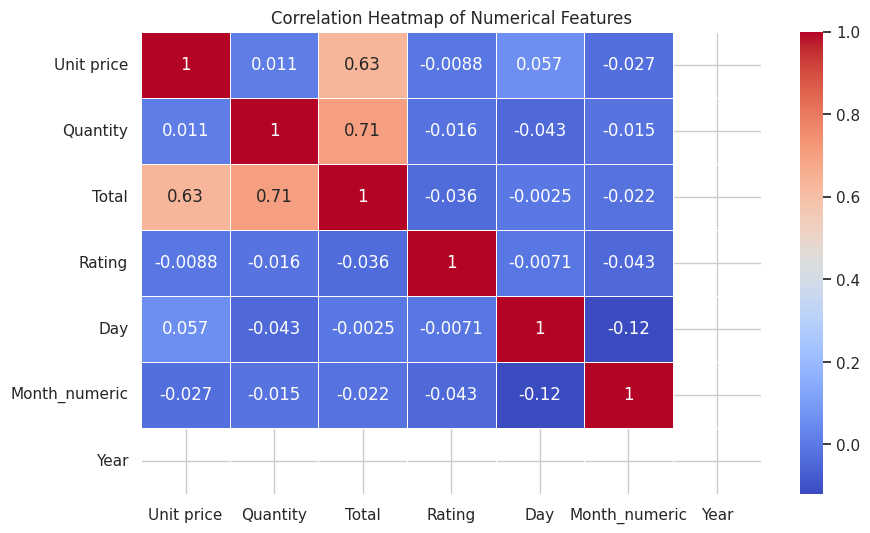

In [367]:
numerical_cols = ['Unit price', 'Quantity', 'Total', 'Rating', 'Day', 'Month_numeric', 'Year']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Sales**

## 1.branch with the most sale

<ipython-input-368-4b7268413b08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='branch_city', y='Total', data=branch_sales, palette='Blues_d')


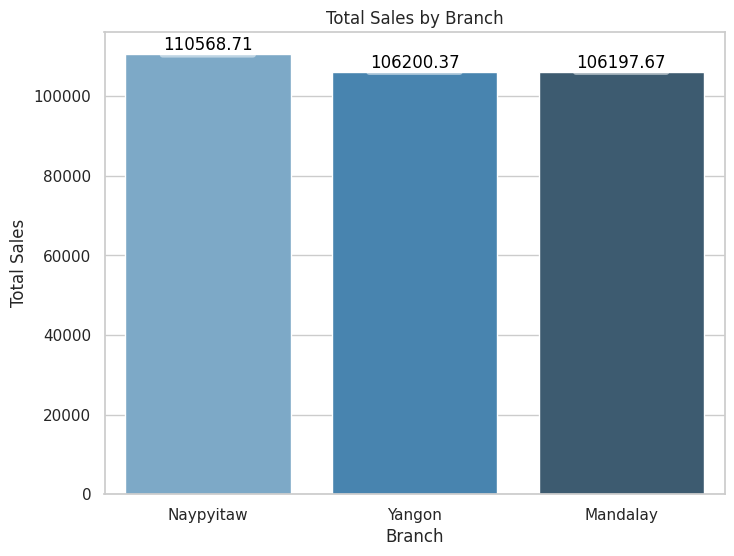

In [368]:
# Group data by 'Branch' and calculate total sales
branch_sales = data.groupby('branch_city')['Total'].sum().reset_index()

# Sort the branches by total sales in descending order
branch_sales = branch_sales.sort_values(by='Total', ascending=False)

# Plot total sales by branch
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='branch_city', y='Total', data=branch_sales, palette='Blues_d')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height,
        f'{height:.2f}',
        ha='center', va='bottom',  # Center horizontally and align with the bottom of the bar
        fontsize=12,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2')
    )

plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.show()

## 2. Sales distribution by product line and city

<ipython-input-369-1df0f3d10cb6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Product line', y='Total', hue='branch_city', data=data, ci=None)


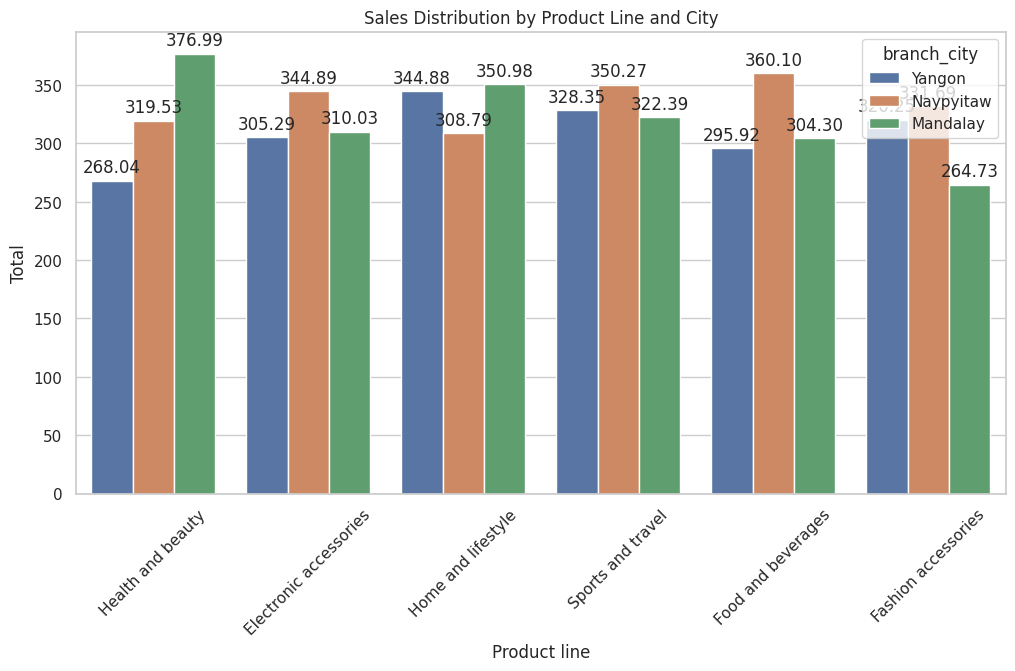

In [369]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Product line', y='Total', hue='branch_city', data=data, ci=None)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Sales Distribution by Product Line and City')
plt.xticks(rotation=45)
plt.show()

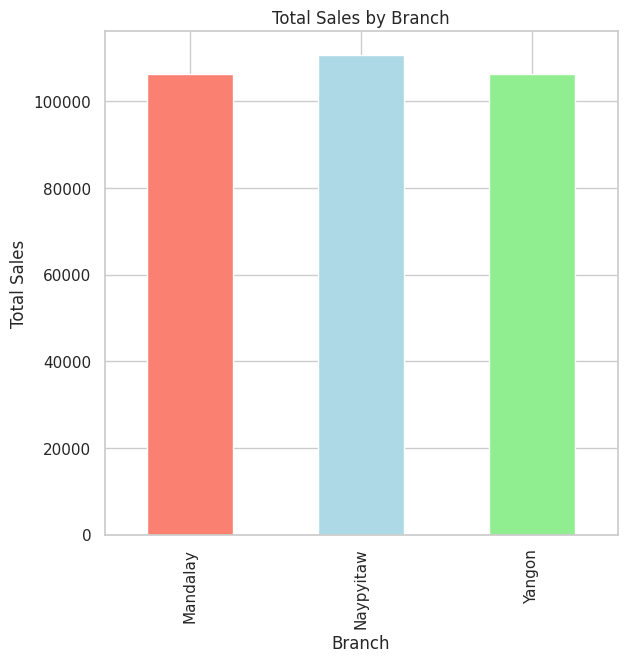

In [370]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
# 2. Branch Comparison (Total Sales per Branch)
branch_sales = data.groupby('branch_city')['Total'].sum()
plt.subplot(2, 3, 2)
branch_sales.plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.tight_layout()
plt.show()

#total quantity of items sold

<ipython-input-371-3764e31bd249>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_sales.values, y=item_sales.index, palette="viridis")


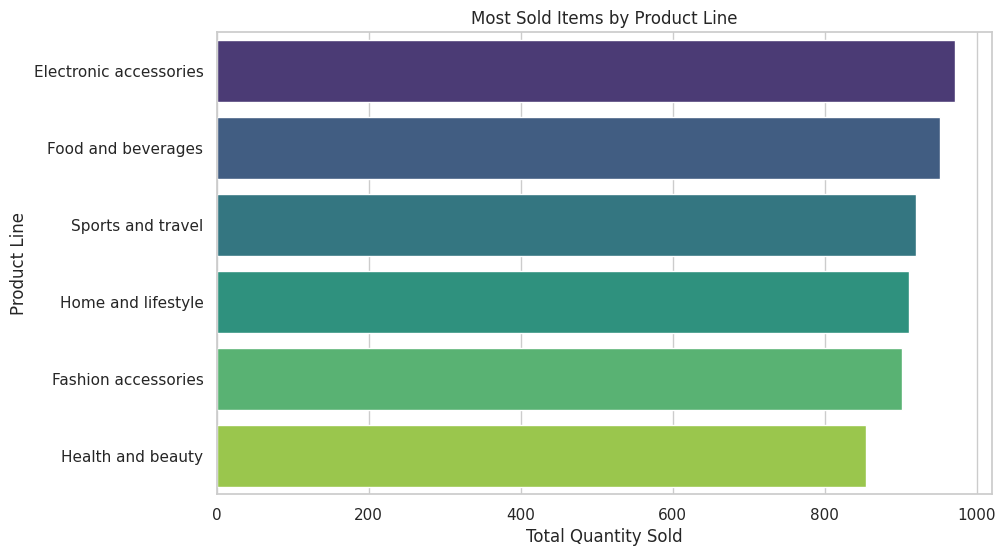

In [371]:
# Group by Product line and sum the quantities
item_sales = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=item_sales.values, y=item_sales.index, palette="viridis")

# Add labels and title
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Line')
plt.title('Most Sold Items by Product Line')
plt.show()

<ipython-input-372-273496a2612b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_product.values, y=profit_by_product.index, palette="magma")


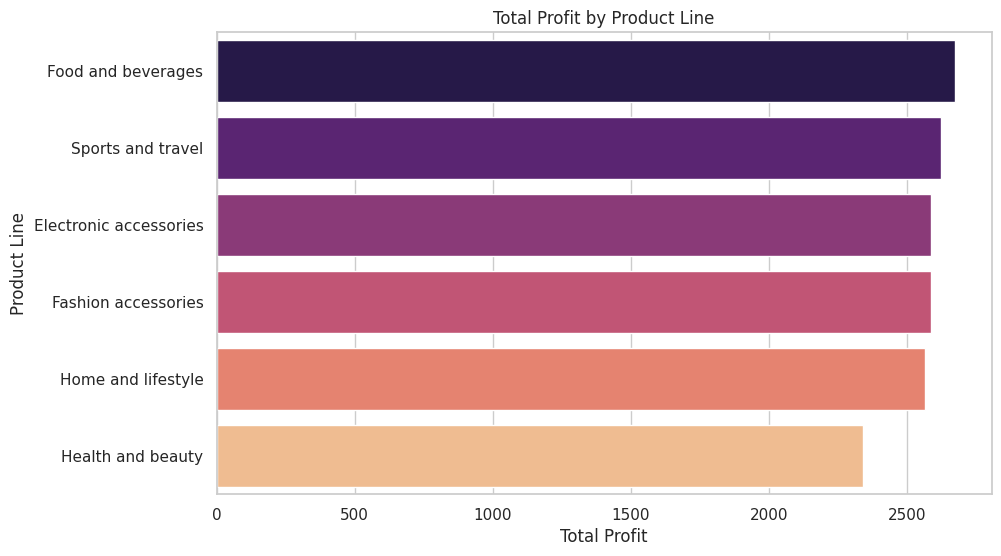

In [372]:
# Calculate Profit for each row
data['Profit'] = data['Total'] - (data['Unit price'] * data['Quantity'])

# Group by Product line and sum the profits
profit_by_product = data.groupby('Product line')['Profit'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_product.values, y=profit_by_product.index, palette="magma")

# Add labels and title
plt.xlabel('Total Profit')
plt.ylabel('Product Line')
plt.title('Total Profit by Product Line')
plt.show()

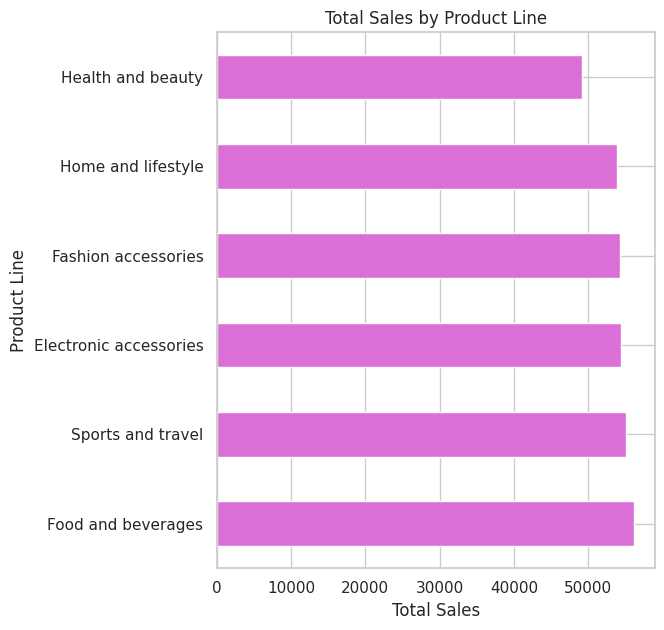

In [373]:
# 3. Product Line Preferences (Distribution of Sales by Product Line)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
product_sales = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)
plt.subplot(2, 3, 3)
product_sales.plot(kind='barh', color='orchid')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

<ipython-input-374-b5201b4a287d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending_by_gender.index, y=spending_by_gender.values, palette="Set2")


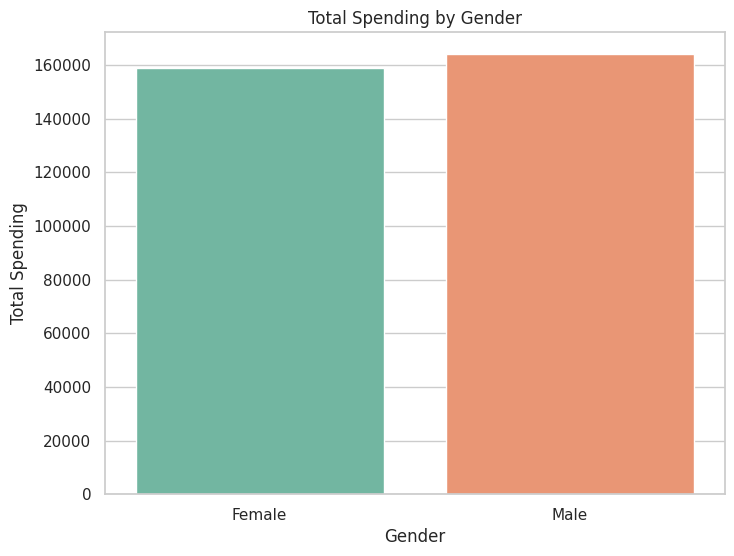

In [374]:
# Group by Gender and sum the total spending
spending_by_gender = data.groupby('Gender')['Total'].sum()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=spending_by_gender.index, y=spending_by_gender.values, palette="Set2")

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.title('Total Spending by Gender')
plt.show()

<ipython-input-375-5a004e72426c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending_by_customer_type.index, y=spending_by_customer_type.values, palette="Blues")


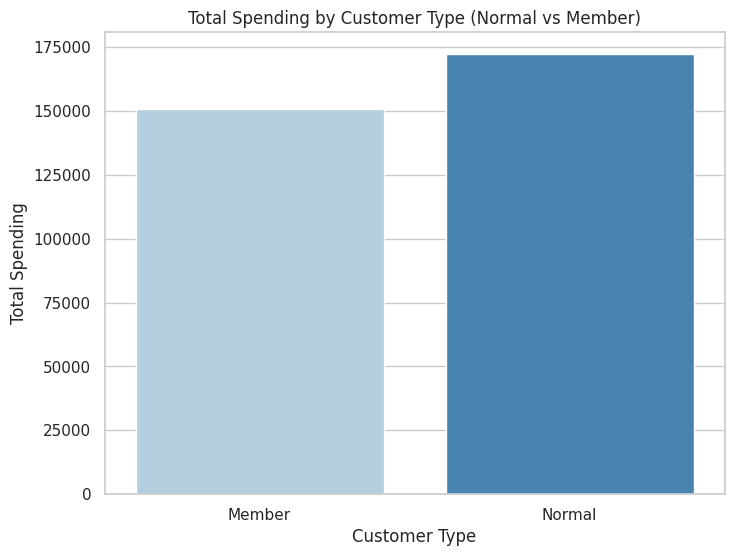

In [375]:
# Group by Customer type and sum the total spending
spending_by_customer_type = data.groupby('Customer type')['Total'].sum()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=spending_by_customer_type.index, y=spending_by_customer_type.values, palette="Blues")

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Total Spending')
plt.title('Total Spending by Customer Type (Normal vs Member)')
plt.show()

<ipython-input-376-e35120f97f21>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Quantity', data=items_sold_by_branch, palette='viridis')


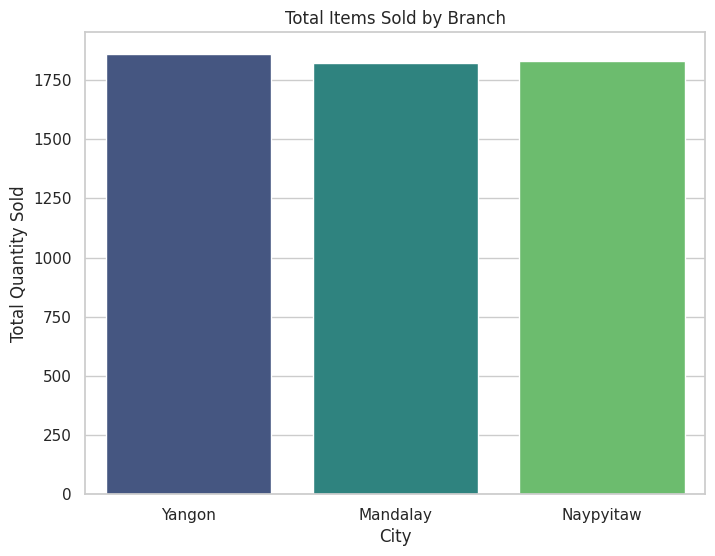

In [376]:
# Calculate the total quantity sold for each branch
items_sold_by_branch = data.groupby('Branch')['Quantity'].sum().reset_index()

# Rename the branches to their corresponding cities
branch_to_city = {'A': 'Yangon', 'B': 'Mandalay', 'C': 'Naypyitaw'}
items_sold_by_branch['City'] = items_sold_by_branch['Branch'].map(branch_to_city)

# Plot the total items sold by branch
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Quantity', data=items_sold_by_branch, palette='viridis')
plt.title('Total Items Sold by Branch')
plt.ylabel('Total Quantity Sold')
plt.xlabel('City')
plt.show()

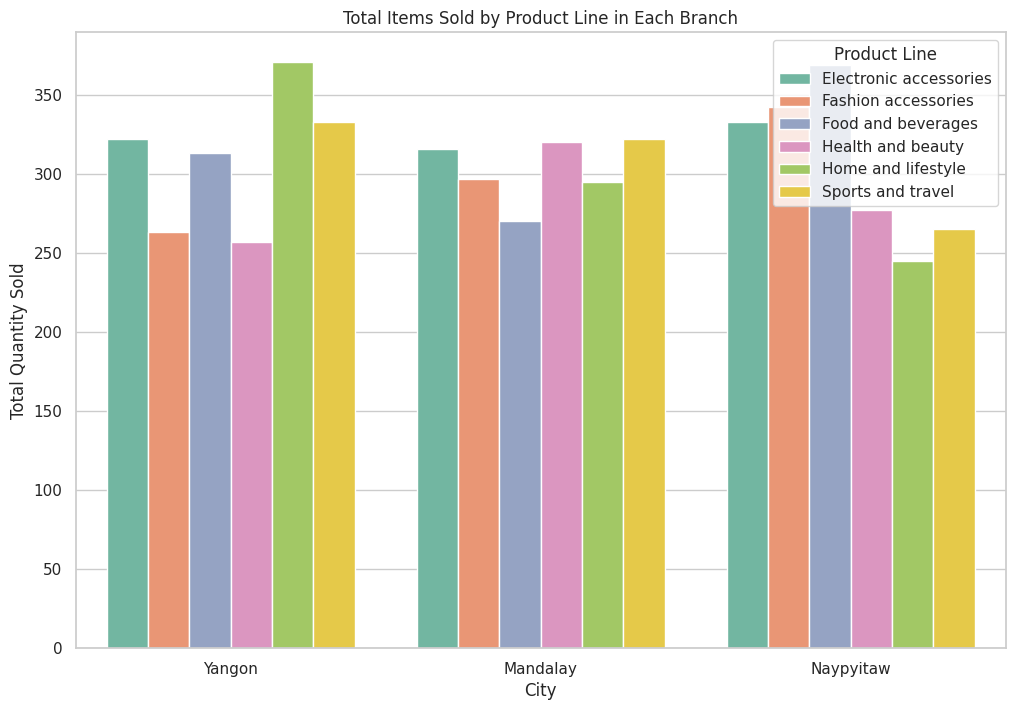

In [377]:
# Calculate the total quantity sold for each product line in each branch
product_line_sales = data.groupby(['Branch', 'Product line'])['Quantity'].sum().reset_index()

# Rename the branches to their corresponding cities
branch_to_city = {'A': 'Yangon', 'B': 'Mandalay', 'C': 'Naypyitaw'}
product_line_sales['City'] = product_line_sales['Branch'].map(branch_to_city)

# Plot the total items sold by product line in each branch
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Quantity', hue='Product line', data=product_line_sales, palette='Set2')
plt.title('Total Items Sold by Product Line in Each Branch')
plt.ylabel('Total Quantity Sold')
plt.xlabel('City')
plt.legend(title='Product Line')
plt.show()


# **per Month**

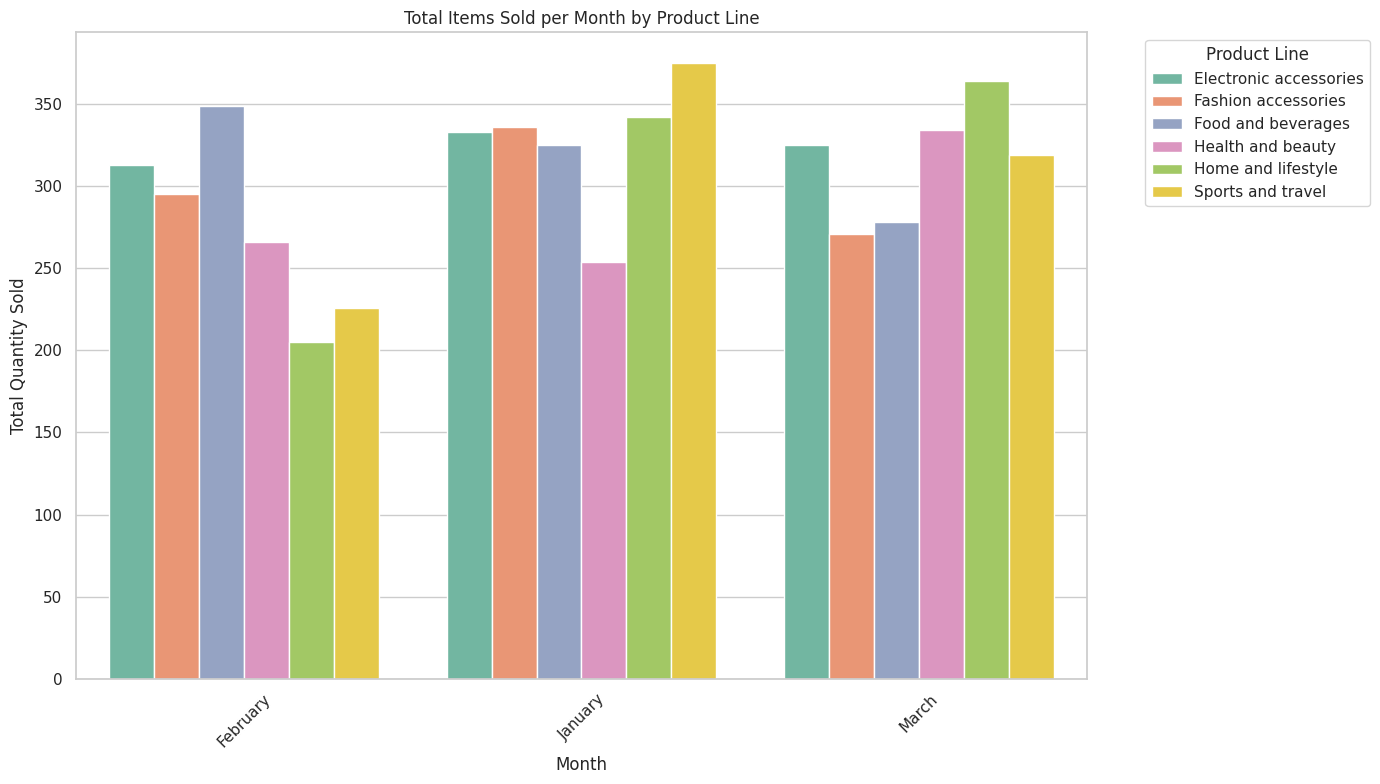

In [378]:
# Calculate the total quantity sold for each product line per month
monthly_sales = data.groupby(['Month_string', 'Product line'])['Quantity'].sum().reset_index()

# Convert 'Month' back to datetime for better plotting


# Plot the total items sold by product line per month
plt.figure(figsize=(14, 8))
sns.barplot(x='Month_string', y='Quantity', hue='Product line', data=monthly_sales, palette='Set2')
plt.title('Total Items Sold per Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##5.Total Sales by Month

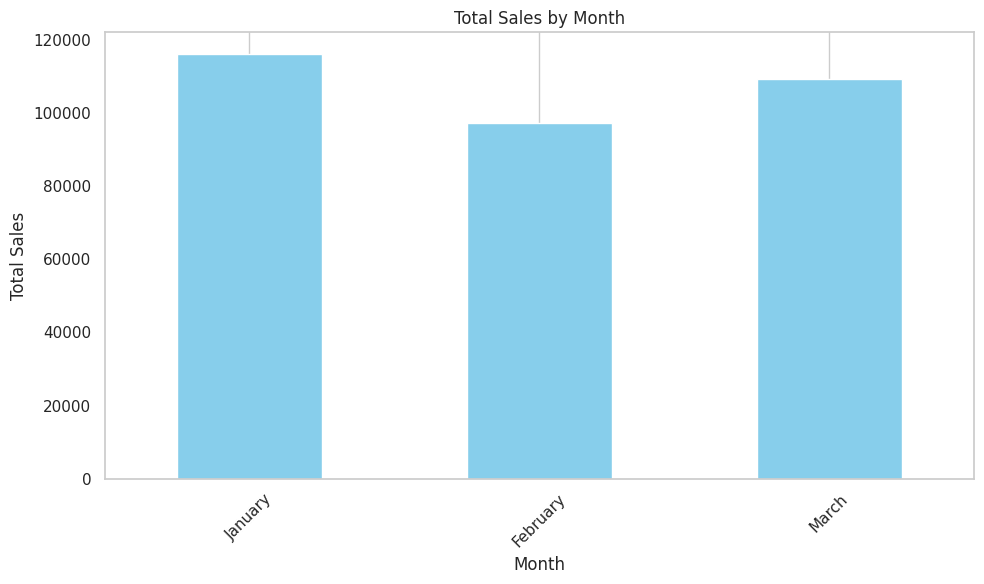

In [379]:
# Convert the 'Date' column to datetime and extract the month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
# Group by month and sum the sales (Total)
monthly_sales = data.groupby('Month')['Total'].sum()

# Sort the months in calendar order
monthly_sales = monthly_sales.reindex([
    'January', 'February', 'March'
])

# Plot the results
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

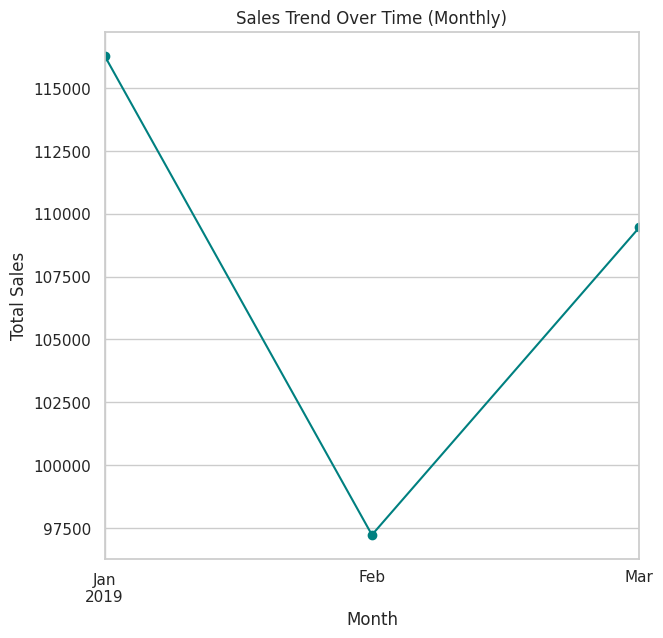

In [380]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
# 1. Sales Trend Over Time (Monthly)
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Total'].sum()
plt.subplot(2, 3, 1)
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Sales Trend Over Time (Monthly)')
plt.ylabel('Total Sales')
plt.xlabel('Month')
# Layout adjustment
plt.tight_layout()
plt.show()

# **gender and customer type**

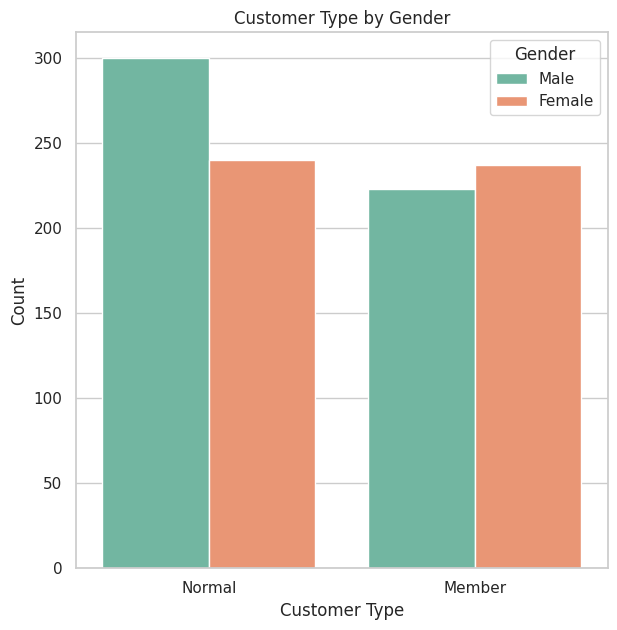

In [381]:
# 5. Customer Demographics (Customer Type by Gender)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 5)
sns.countplot(data=data, x='Customer type', hue='Gender', palette='Set2')
plt.title('Customer Type by Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-382-84b6a4919a40>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Branch', y='Rating', data=data, palette='coolwarm')


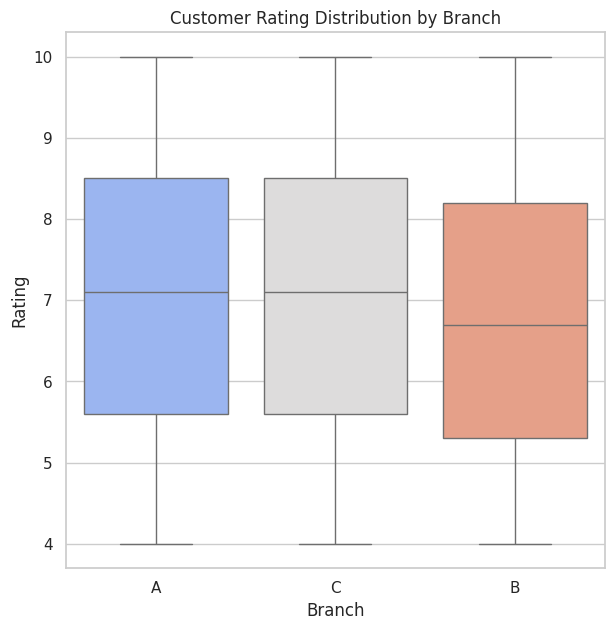

In [382]:
# 6. Customer Rating Trends (Distribution of Ratings by Branch)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 6)
sns.boxplot(x='Branch', y='Rating', data=data, palette='coolwarm')
plt.title('Customer Rating Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

<ipython-input-383-8a0b60a590dd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=members_by_gender.index, y=members_by_gender.values, palette="pastel")


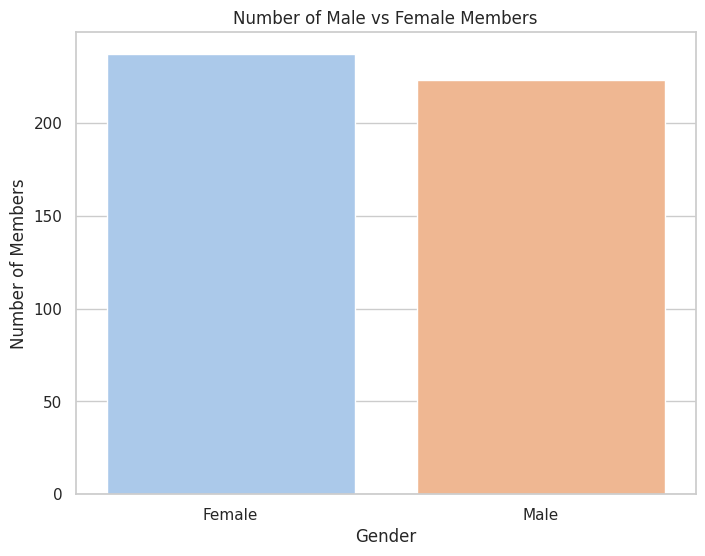

In [383]:
# Filter the data for "Member" customer type
member_data = data[data['Customer type'] == 'Member']

# Group by Gender and count the number of members
members_by_gender = member_data['Gender'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=members_by_gender.index, y=members_by_gender.values, palette="pastel")

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Members')
plt.title('Number of Male vs Female Members')
plt.show()

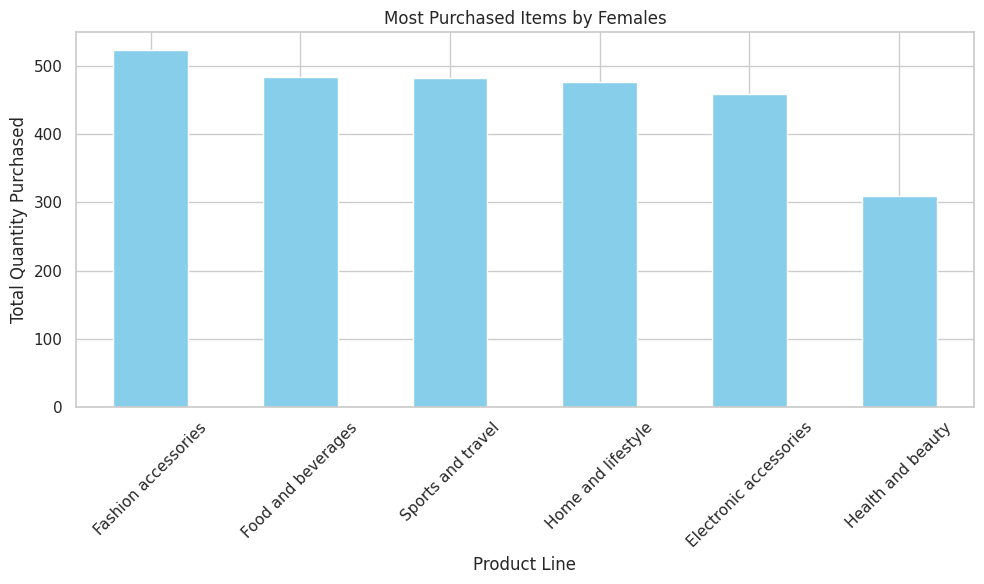

In [384]:
# Step 1: Filter data for female customers
female_data = data[data['Gender'] == 'Female']

# Step 2: Group by item/product and sum the quantities
item_purchases = female_data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Step 3: Plot a bar chart to show the most purchased items by females
plt.figure(figsize=(10,6))
item_purchases.plot(kind='bar', color='skyblue')
plt.title('Most Purchased Items by Females')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

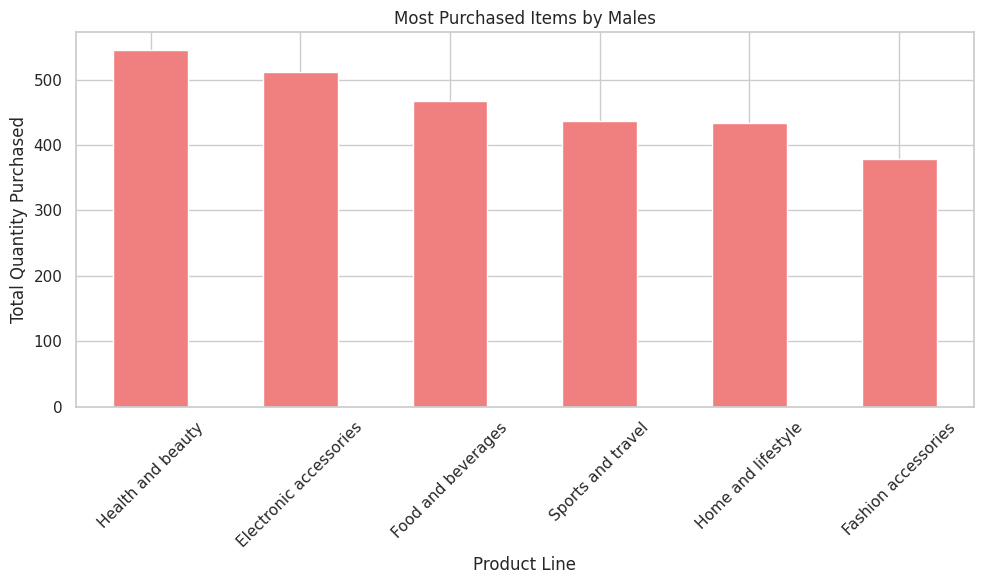

In [385]:
# Step 1: Filter data for male customers
male_data = data[data['Gender'] == 'Male']

# Step 2: Group by item/product and sum the quantities
male_item_purchases = male_data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Step 3: Plot a bar chart to show the most purchased items by males
plt.figure(figsize=(10,6))
male_item_purchases.plot(kind='bar', color='lightcoral')
plt.title('Most Purchased Items by Males')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

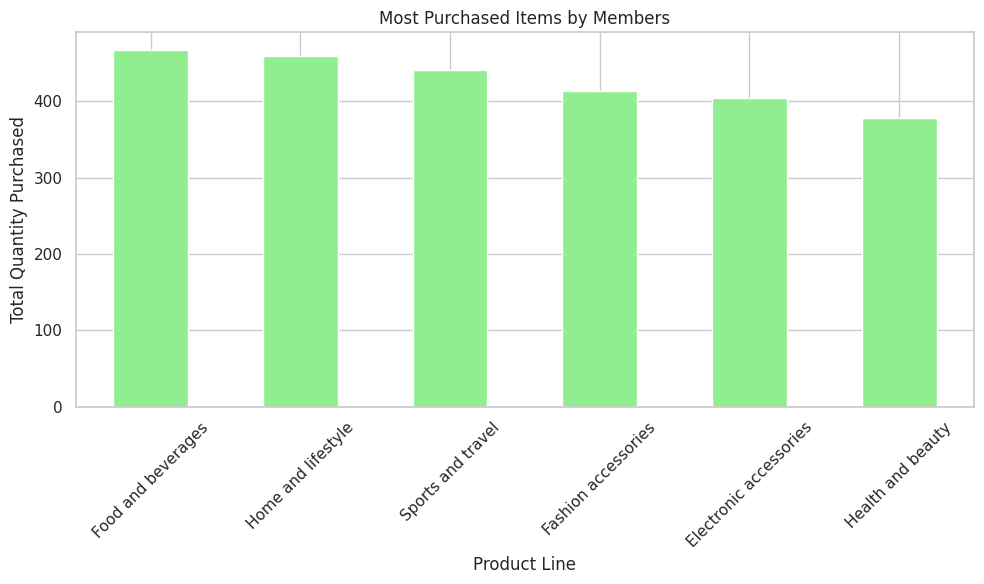

In [386]:
# Step 1: Filter data for members (assuming membership info is stored in a 'Customer type' column)
member_data = data[data['Customer type'] == 'Member']

# Step 2: Group by item/product and sum the quantities
member_item_purchases = member_data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Step 3: Plot a bar chart to show the most purchased items by members
plt.figure(figsize=(10,6))
member_item_purchases.plot(kind='bar', color='lightgreen')
plt.title('Most Purchased Items by Members')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

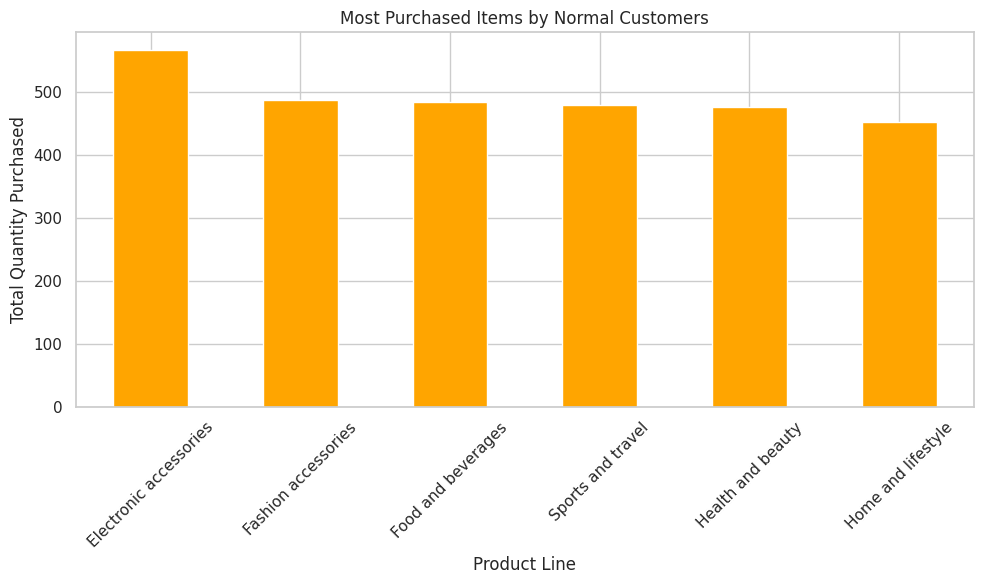

In [387]:
# Step 1: Filter data for normal customers (assuming 'Customer type' column contains 'Normal' for non-members)
normal_data = data[data['Customer type'] == 'Normal']

# Step 2: Group by item/product and sum the quantities
normal_item_purchases = normal_data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Step 3: Plot a bar chart to show the most purchased items by normal customers
plt.figure(figsize=(10,6))
normal_item_purchases.plot(kind='bar', color='orange')
plt.title('Most Purchased Items by Normal Customers')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

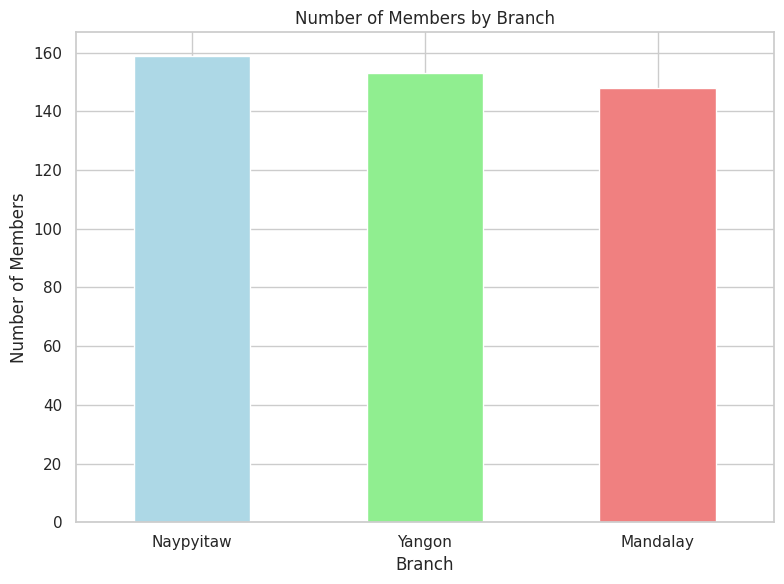

In [388]:
# Step 1: Filter data for members (assuming 'Customer type' column contains 'Member')
member_data = data[data['Customer type'] == 'Member']

# Step 2: Group by branch and count the number of members
members_per_branch = member_data.groupby('branch_city').size().sort_values(ascending=False)

# Step 3: Plot a bar chart to show which branch has the most members
plt.figure(figsize=(8,6))
members_per_branch.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Number of Members by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Rating**

<ipython-input-389-5e08a92edfb3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Rating', data=city_ratings, palette='coolwarm')


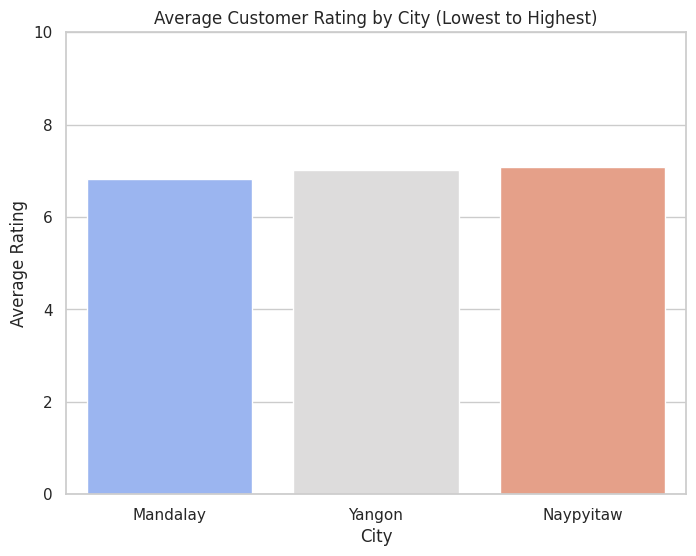

In [389]:
# Calculate the average rating for each city (Branch)
city_ratings = data.groupby('Branch')['Rating'].mean().reset_index()

# Rename the branches to their corresponding cities
branch_to_city = {'A': 'Yangon', 'B': 'Mandalay', 'C': 'Naypyitaw'}
city_ratings['City'] = city_ratings['Branch'].map(branch_to_city)

# Sort the cities by average rating in ascending order (lowest rating first)
city_ratings = city_ratings.sort_values(by='Rating', ascending=True)

# Plot the average ratings by city
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Rating', data=city_ratings, palette='coolwarm')
plt.title('Average Customer Rating by City (Lowest to Highest)')
plt.ylabel('Average Rating')
plt.xlabel('City')
plt.ylim(0, 10)  # Assuming the rating scale is 0-10
plt.show()

<ipython-input-390-a0aa150376e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Product line', data=product_line_ratings.sort_values(by='Rating', ascending=False), palette='coolwarm')


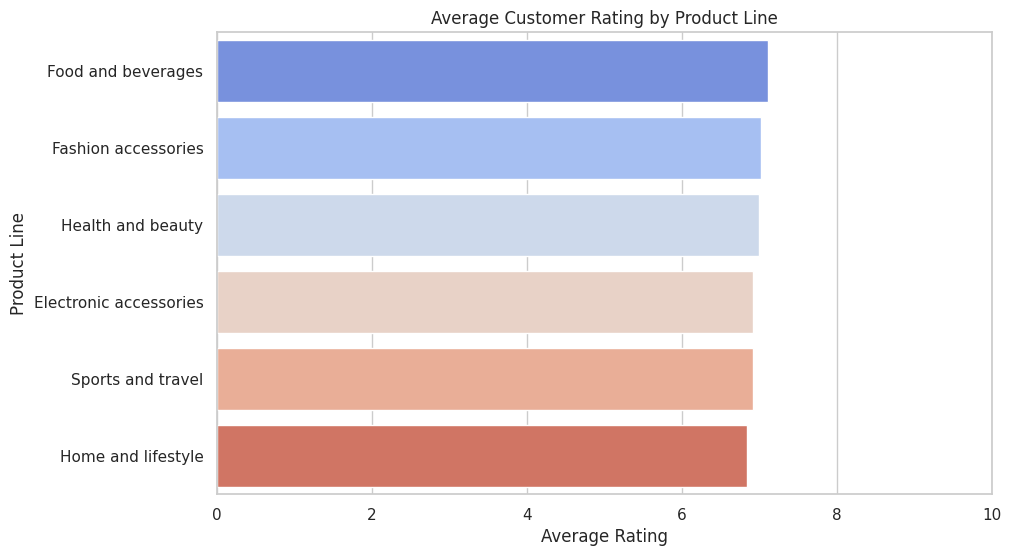

In [390]:
# Calculate the average rating for each product line
product_line_ratings = data.groupby('Product line')['Rating'].mean().reset_index()

# Plot the average rating by product line
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Product line', data=product_line_ratings.sort_values(by='Rating', ascending=False), palette='coolwarm')
plt.title('Average Customer Rating by Product Line')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.xlim(0, 10)  # Assuming the rating scale is 0-10
plt.show()

<ipython-input-391-e6a7750de2a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Payment', data=payment_ratings.sort_values(by='Rating', ascending=False), palette='coolwarm')


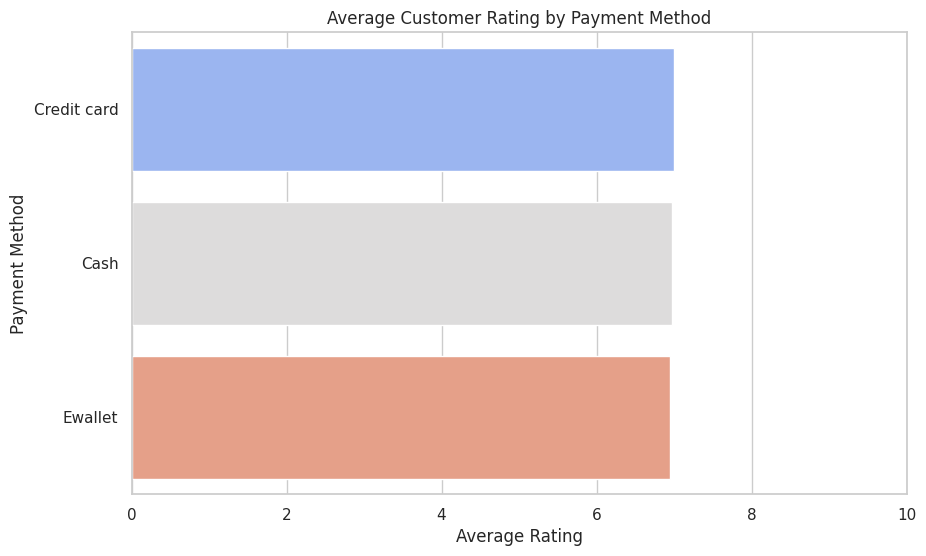

In [391]:
# Calculate the average rating for each payment method
payment_ratings = data.groupby('Payment')['Rating'].mean().reset_index()

# Plot the average rating by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Payment', data=payment_ratings.sort_values(by='Rating', ascending=False), palette='coolwarm')
plt.title('Average Customer Rating by Payment Method')
plt.xlabel('Average Rating')
plt.ylabel('Payment Method')
plt.xlim(0, 10)  # Assuming the rating scale is 0-10
plt.show()

<ipython-input-392-970bc1e7fa8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Payment', data=payment_ratings.sort_values(by='Rating', ascending=False), palette='coolwarm')


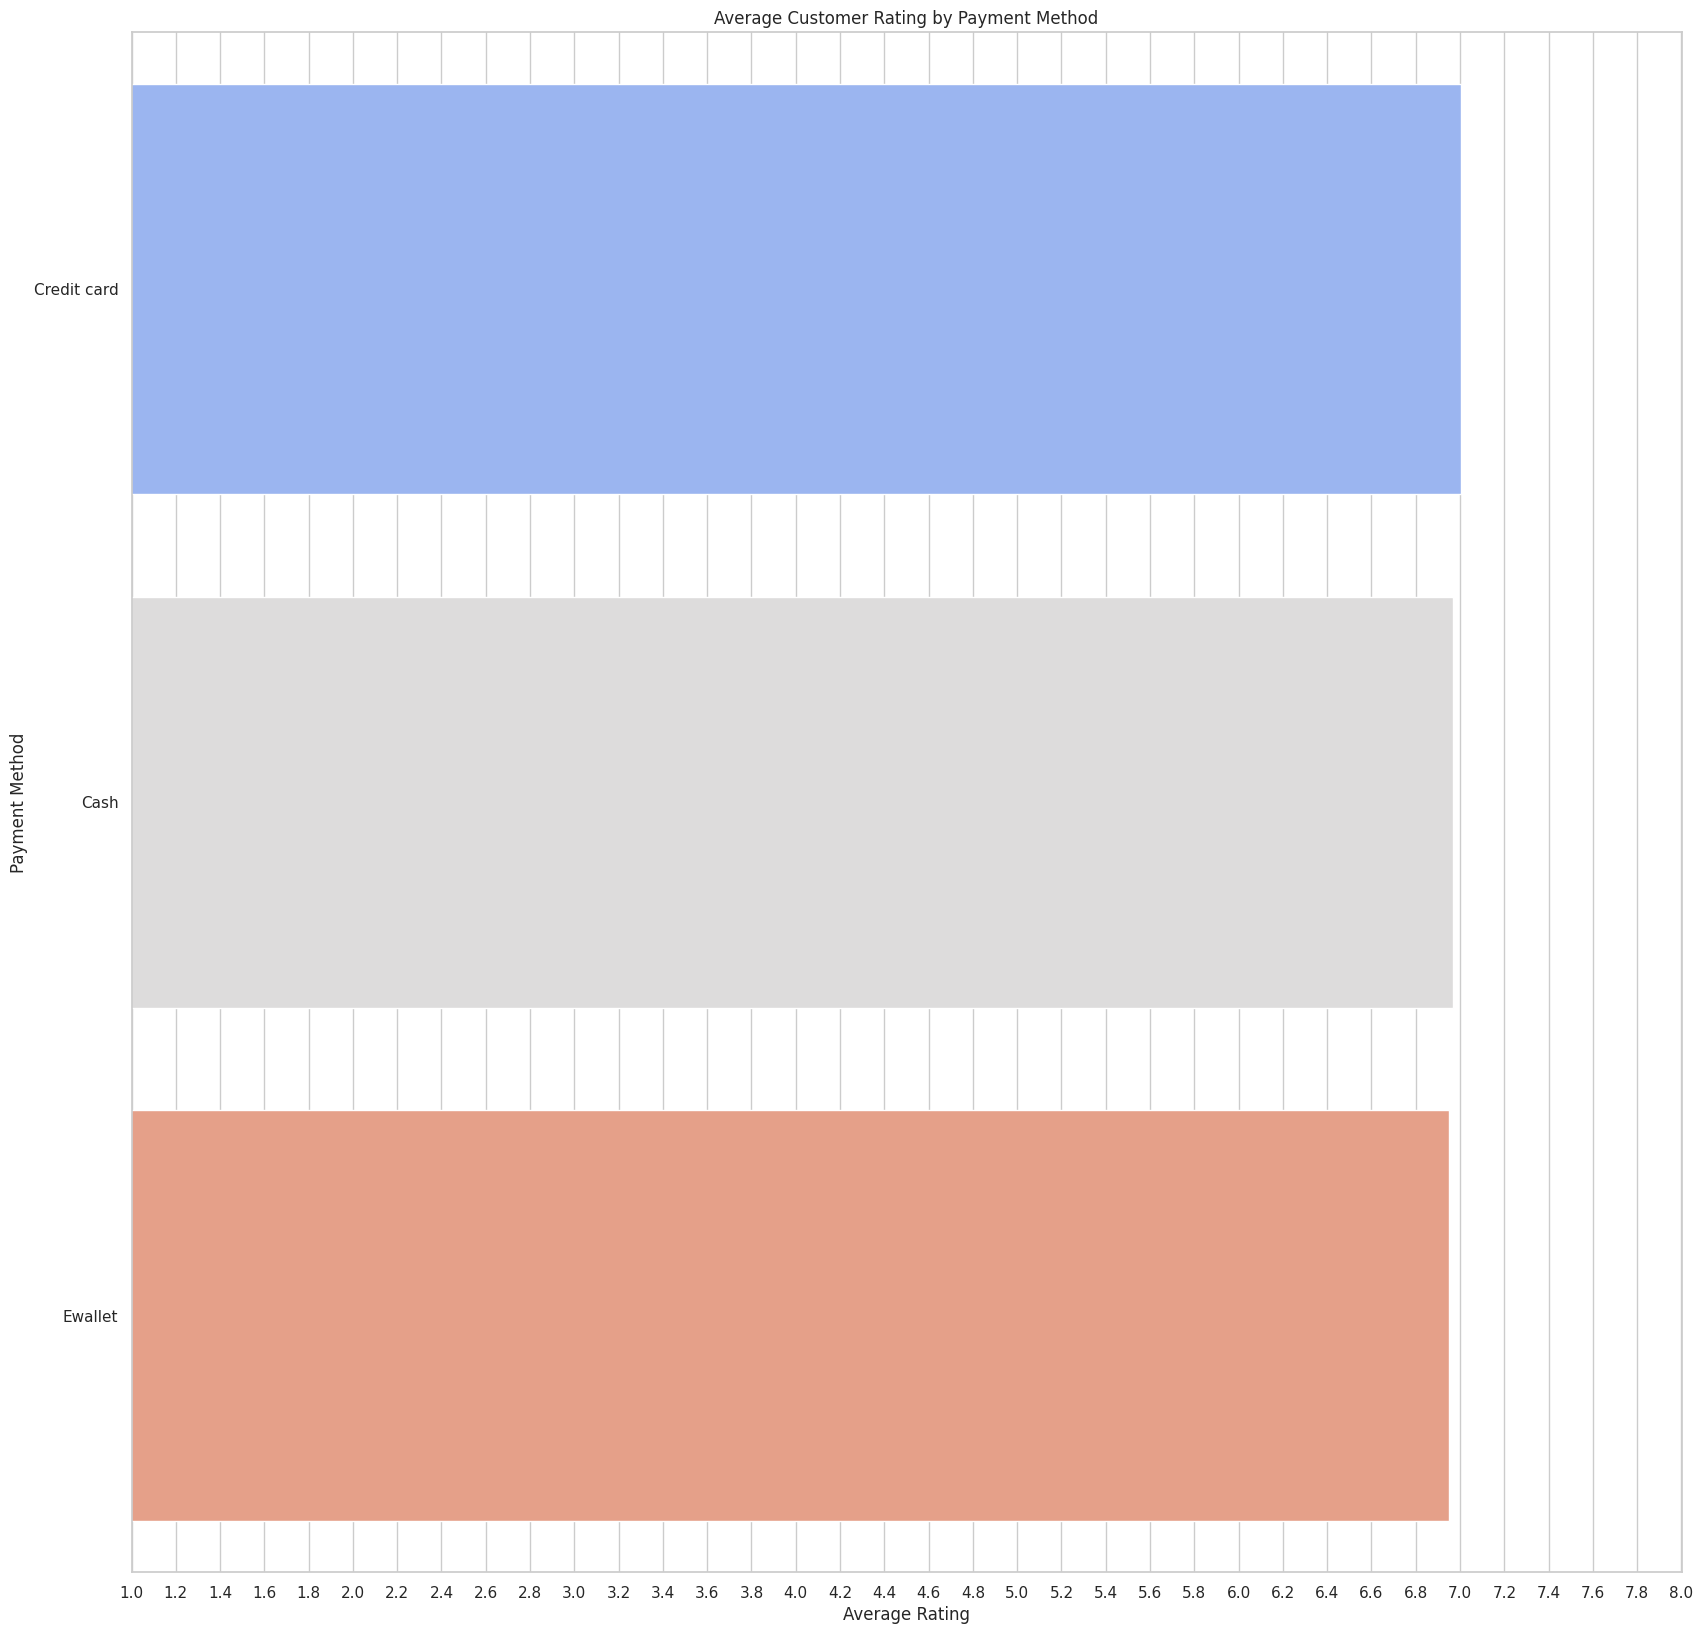

In [392]:
# Calculate the average rating for each payment method
payment_ratings = data.groupby('Payment')['Rating'].mean().reset_index()

# Plot the average rating by payment method with customized x-axis ticks
plt.figure(figsize=(20, 20))
sns.barplot(x='Rating', y='Payment', data=payment_ratings.sort_values(by='Rating', ascending=False), palette='coolwarm')
plt.title('Average Customer Rating by Payment Method')
plt.xlabel('Average Rating')
plt.ylabel('Payment Method')

# Set x-axis limits and customize ticks from 1 to 10 with increments of 0.1
plt.xlim(1, 8)
plt.xticks(np.arange(1, 8.1, 0.2))

plt.show()

# **Payment**

# **1.Most Used Payment Methods**

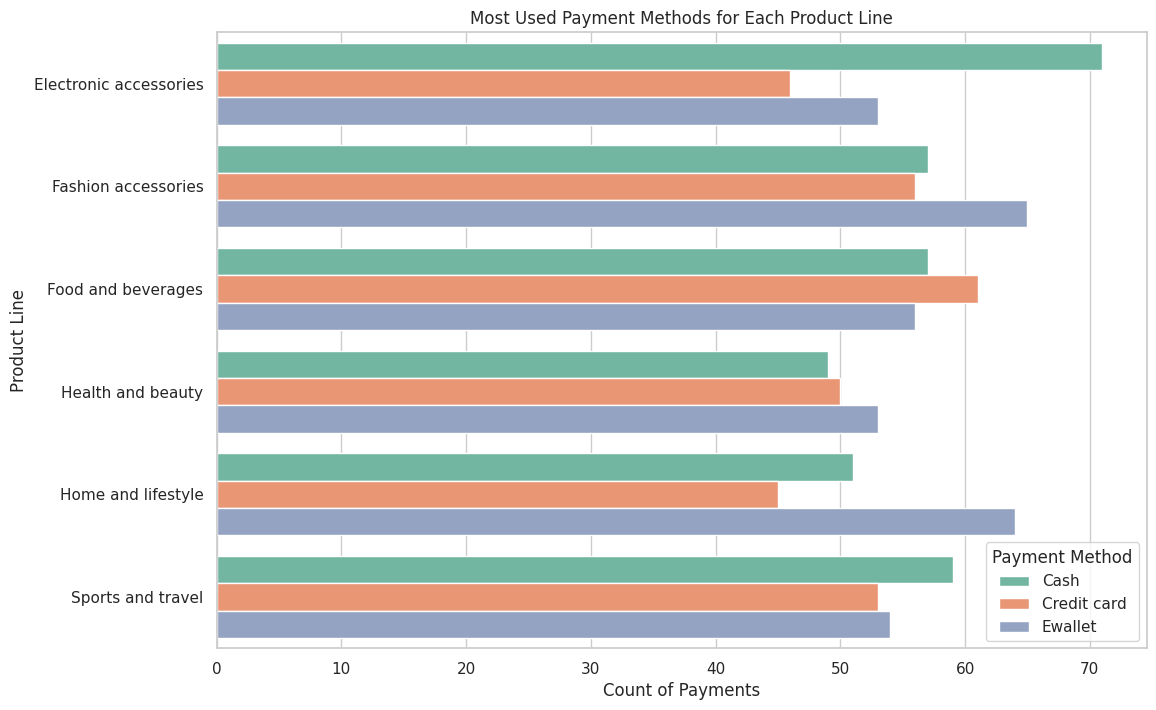

In [393]:
# Calculate the count of payment methods used for each product line
payment_by_product_line = data.groupby(['Product line', 'Payment']).size().reset_index(name='Count')

# Plot the payment methods by product line
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Product line', hue='Payment', data=payment_by_product_line, palette='Set2')
plt.title('Most Used Payment Methods for Each Product Line')
plt.xlabel('Count of Payments')
plt.ylabel('Product Line')
plt.legend(title='Payment Method')
plt.show()

##2. Payment Method Insights (Payment Method Distribution)

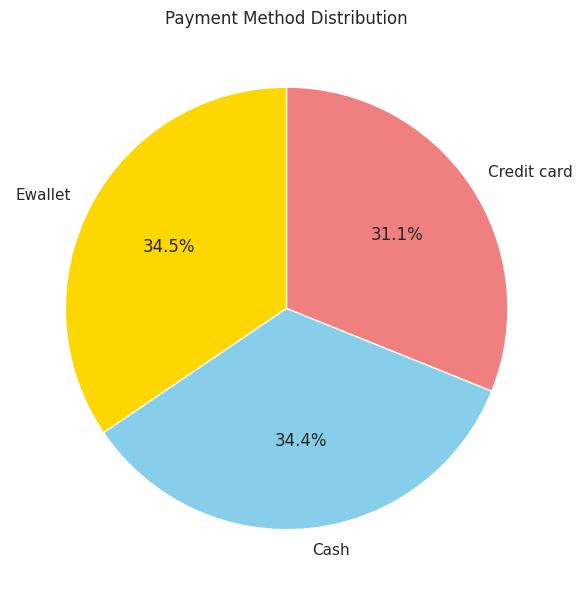

In [394]:
# 2. Payment Method Insights (Payment Method Distribution)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
payment_methods = data['Payment'].value_counts()
plt.subplot(2, 3, 4)
payment_methods.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightcoral'], startangle=90, wedgeprops={'linewidth': 1})
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


## 3. Gender distribution and payment methods

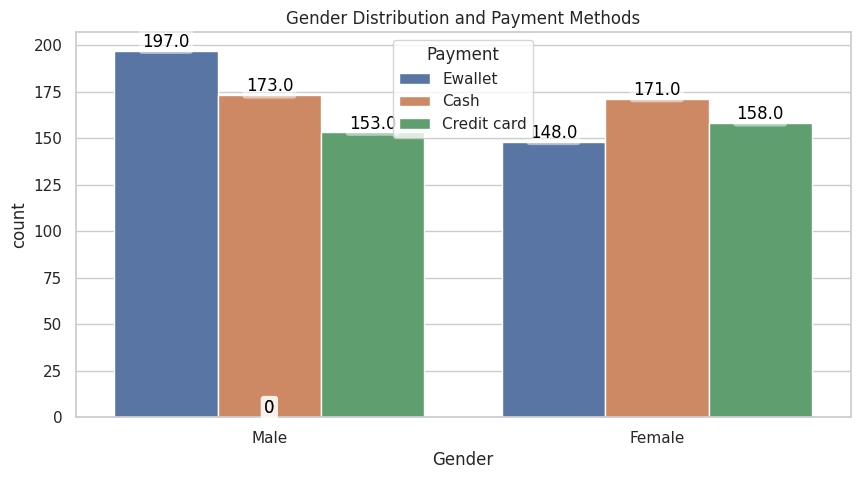

In [395]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Gender', hue='Payment', data=data)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height,
        f'{height}',
        ha='center', va='bottom',  # Center horizontally and align with the bottom of the bar
        fontsize=12,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2')
    )

plt.title('Gender Distribution and Payment Methods')
plt.show()